<a href="https://colab.research.google.com/github/riddhi4599/Womens_Pregnancies/blob/main/Womens_Pregnancies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams

%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [ ]:
!pip install squarify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
df = pd.read_csv('/content/drive/My Drive/Births_By_Age_of_Mother__1960-2013.csv')

In [ ]:
print('Dataset description')
df.describe()



Dataset description


,Year,Count
count,486.000000,486.000000
mean,1986.500000,50839.742798
std,15.601844,53820.349828
min,1960.000000,17.000000
25%,1973.000000,812.500000
50%,1986.500000,34249.500000
75%,2000.000000,96639.250000
max,2013.000000,182923.000000


In [ ]:
print('dataset first and last few rows')
display(df.head(),df.tail())

dataset first and last few rows


,Year,AGE,Count
0,1960,UNDER 15,443
1,1960,15-19,54010
2,1960,20-24,128313
3,1960,25-29,94704
4,1960,30-34,57569


,Year,AGE,Count
481,2013,30-34,139106
482,2013,35-39,76671
483,2013,40-44,19248
484,2013,45 AND OVER,1732
485,2013,UNKNOWN,60


In [ ]:
print('Dataset information')
display(df.info())

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    486 non-null    int64 
 1   AGE     486 non-null    object
 2   Count   486 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.5+ KB


None

In [ ]:
var1 = df.select_dtypes(include=['object']).keys()
print(var1)

var2 = df.select_dtypes(include=['int', 'float']).keys()
print(var2)



Index(['AGE'], dtype='object')
Index(['Year', 'Count'], dtype='object')


In [ ]:
print(df.isnull().sum())
print('All values have been entered')

Year     0
AGE      0
Count    0
dtype: int64
All values have been entered


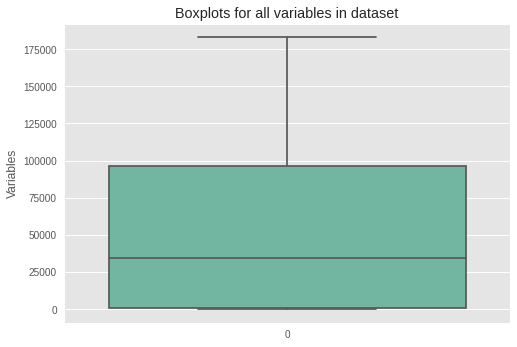

In [ ]:
plt.style.use('ggplot')



ax = plt.gca()
ax.set_xlim([0,182928])
plt.ylabel('Variables')
plt.title('Boxplots for all variables in dataset')

ax = sns.boxplot(data= df['Count'], orient='v', palette='Set2')

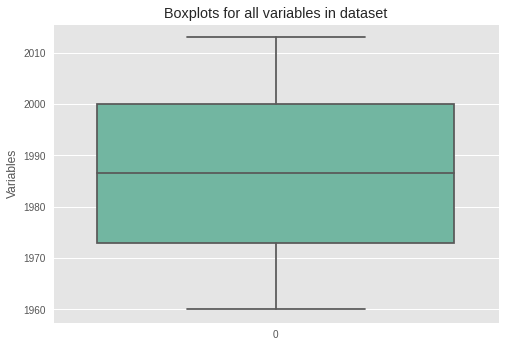

In [ ]:
plt.style.use('ggplot')


ax.set_facecolor('#fafafa')
ax = plt.gca()
ax.set_xlim([1920,2015])
plt.ylabel('Variables')
plt.title('Boxplots for all variables in dataset')

ax = sns.boxplot(data= df['Year'], orient='v', palette='Set2')

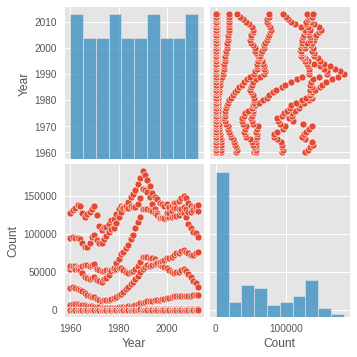

In [ ]:
sns.pairplot(df,palette = 'coolwarm')

Time series graph


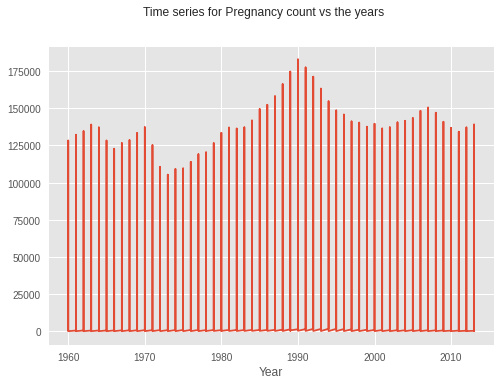

In [ ]:
import matplotlib.pyplot as plt

print('Time series graph')
ts = pd.Series(df['Count'].values, index = df['Year'])
fig = plt.figure()
plt.suptitle('Time series for Pregnancy count vs the years')
ts.plot()

Time series graph


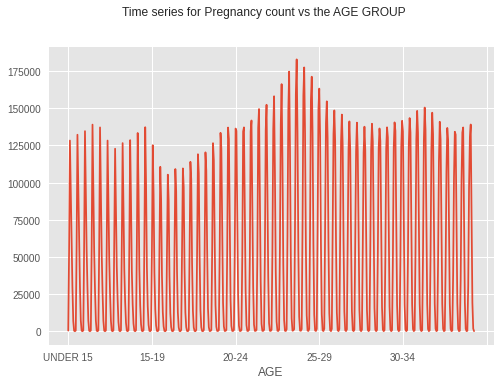

In [ ]:
import matplotlib.pyplot as plt

print('Time series graph')
ts = pd.Series(df['Count'].values, index = df['AGE'])
fig = plt.figure()
plt.suptitle('Time series for Pregnancy count vs the AGE GROUP')
ts.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86793c2438>,
      dtype=object)

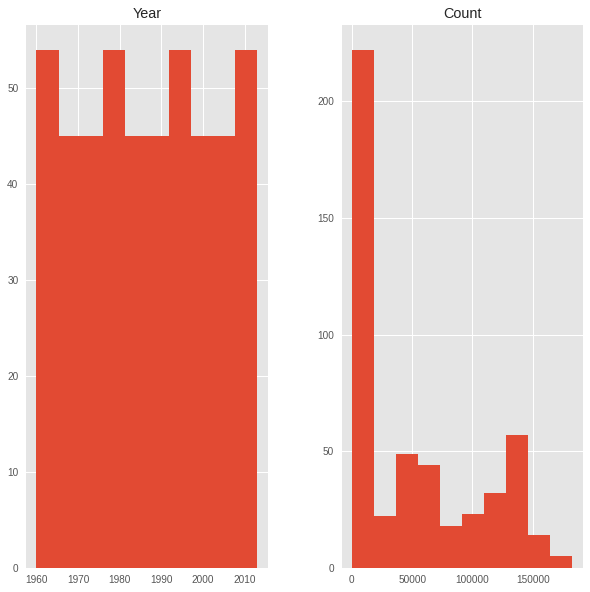

In [ ]:
rcParams['figure.figsize'] = 10,10
df[var2].hist()

In [ ]:
df['AGE'].value_counts()

35-39          54
40-44          54
UNKNOWN        54
30-34          54
20-24          54
UNDER 15       54
45 AND OVER    54
15-19          54
25-29          54
Name: AGE, dtype: int64

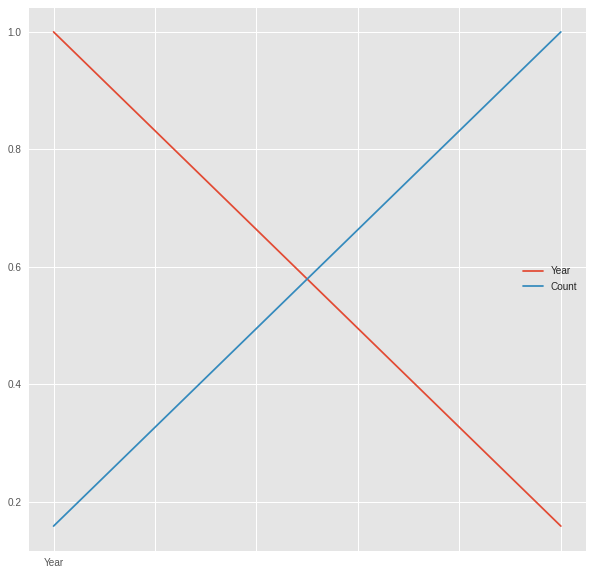

In [ ]:
corel = df.corr()
corel.plot()

In [ ]:
df.mode(axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:892: UserWarning:

Unable to sort modes: '<' not supported between instances of 'str' and 'int'

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:892: UserWarning:

Unable to sort modes: '<' not supported between instances of 'int' and 'str'



,0,1,2
0,1960,443,UNDER 15
1,1960,54010,15-19
2,1960,20-24,128313
3,1960,25-29,94704
4,1960,30-34,57569
...,...,...,...
481,2013,30-34,139106
482,35-39,2013,76671
483,19248,2013,40-44
484,45 AND OVER,2013,1732


In [ ]:
df.shape

(486, 3)

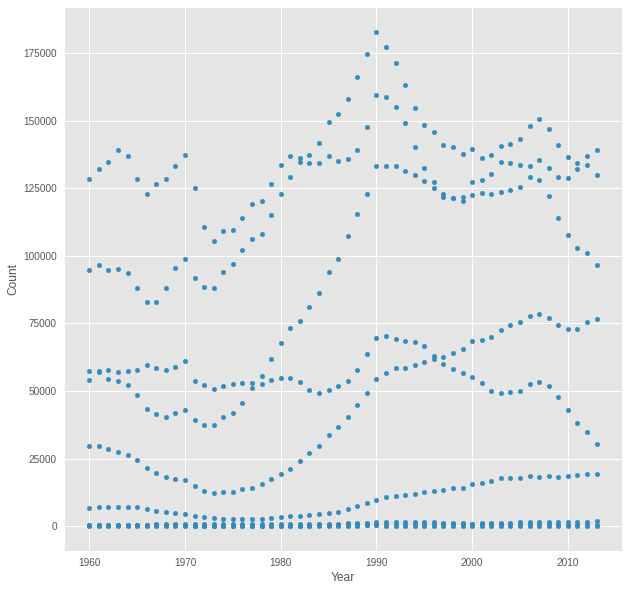

In [ ]:
df.plot(kind='scatter', x='Year', y='Count')
plt.show()

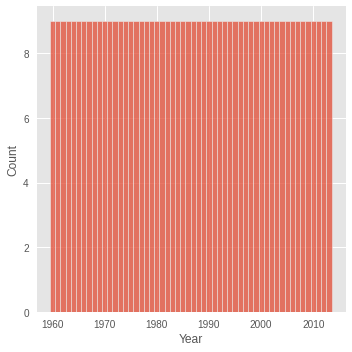

In [ ]:
sns.displot(df, x= 'Year', discrete=True)

the bin edges are
[1960.    1966.625 1973.25  1979.875 1986.5   1993.125 1999.75  2006.375
 2013.   ]
pdf is 
[0.12962963 0.12962963 0.11111111 0.12962963 0.12962963 0.11111111
 0.12962963 0.12962963]


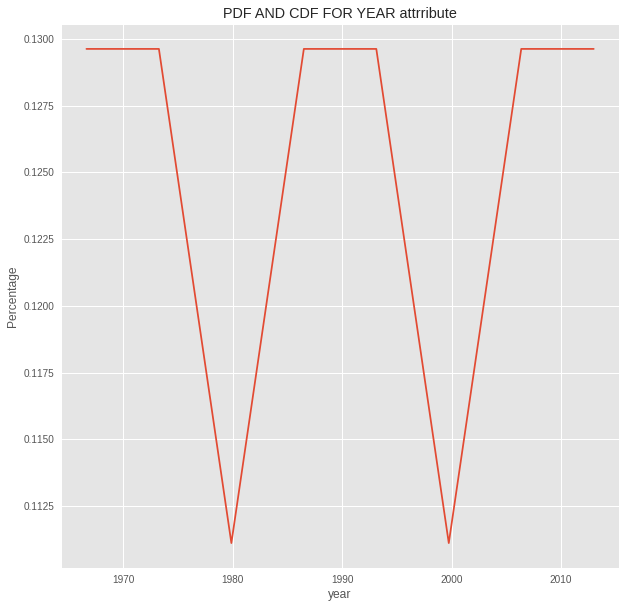

In [ ]:
#For pdf and cdf
import numpy as np
counts,bin_edge = np.histogram(df['Year'], bins=8,density=False)
pdf = counts/sum(counts)
print('the bin edges are')
print(bin_edge)
print('pdf is ')
print(pdf)
plt.gca().legend(['PDF for year'])
plt.title('PDF FOR YEAR attrribute')
plt.xlabel('year')
plt.ylabel('Percentage')
plt.plot(bin_edge[1:],pdf)

the counts are
[244  93  41  89  19]
The pdf is
[0.50205761 0.19135802 0.08436214 0.18312757 0.03909465]
CDF is
[0.50205761 0.69341564 0.77777778 0.96090535 1.        ]


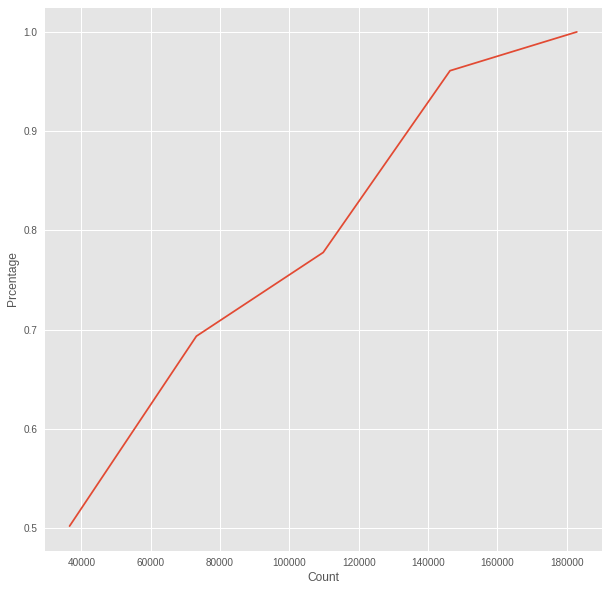

In [ ]:
import numpy as np
counts,bin_edge = np.histogram(df['Count'], bins= 5, density = False)

print('the counts are')
print(counts)

print('The pdf is')
pdf = counts/(sum(counts))
print(pdf)

cdf = np.cumsum(pdf)
print('CDF is')
print(cdf)

plt.gca().legend(['CDF for count'])
plt.xlabel('Count')
plt.ylabel('Prcentage')
plt.plot(bin_edge[1:], cdf)